<a href="https://colab.research.google.com/github/mohith-ds8/Netflix-Movies-and-TV-shows-Clustering/blob/main/Netflix_Movies_and_TV_shows_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - 



##### **Project Type**    - Unsupervised
##### **Contribution**    - Individual
##### **Name**            - Mohith DS
##### **Cohort**          - Enlighten

# **Project Summary -**

Write the summary here within 500-600 words.

# **GitHub Link -**

https://github.com/mohith-ds8/Netflix-Movies-and-TV-shows-Clustering

# **Problem Statement**


**This dataset consists of tv shows and movies available on Netflix as of 2019. The dataset is collected from Flixable which is a third-party Netflix search engine.**

**In 2018, they released an interesting report which shows that the number of TV shows on Netflix has nearly tripled since 2010. The streaming service’s number of movies has decreased by more than 2,000 titles since 2010, while its number of TV shows has nearly tripled. It will be interesting to explore what all other insights can be obtained from the same dataset.**

**We will be clustering similar content by matching text-based features.**

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required. 
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits. 
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule. 

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [1]:
# Import Libraries
# Importing Numpy & Pandas for data processing & data wrangling
import numpy as np
import pandas as pd

# Importing  tools for visualization
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

# Importing libraries for hypothesis testing
from scipy.stats import uniform
from scipy.stats import norm
from scipy.stats import chi2
from scipy.stats import t
from scipy.stats import f
from scipy.stats import ttest_ind
import scipy.stats as stats

### Dataset Loading

In [ ]:
# Load Dataset
df = pd.read_csv('/content/NETFLIX MOVIES AND TV SHOWS CLUSTERING.csv')

### Dataset First View

In [ ]:
# Dataset First Look
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


### Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns count
df.shape

(7787, 12)

### Dataset Information

In [ ]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


#### Duplicate Values

In [ ]:
# Dataset Duplicate Value Count

print(len(df[df.duplicated()]))

0


#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count
# Checking the sum of null values for each column

df.isna().sum()

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64

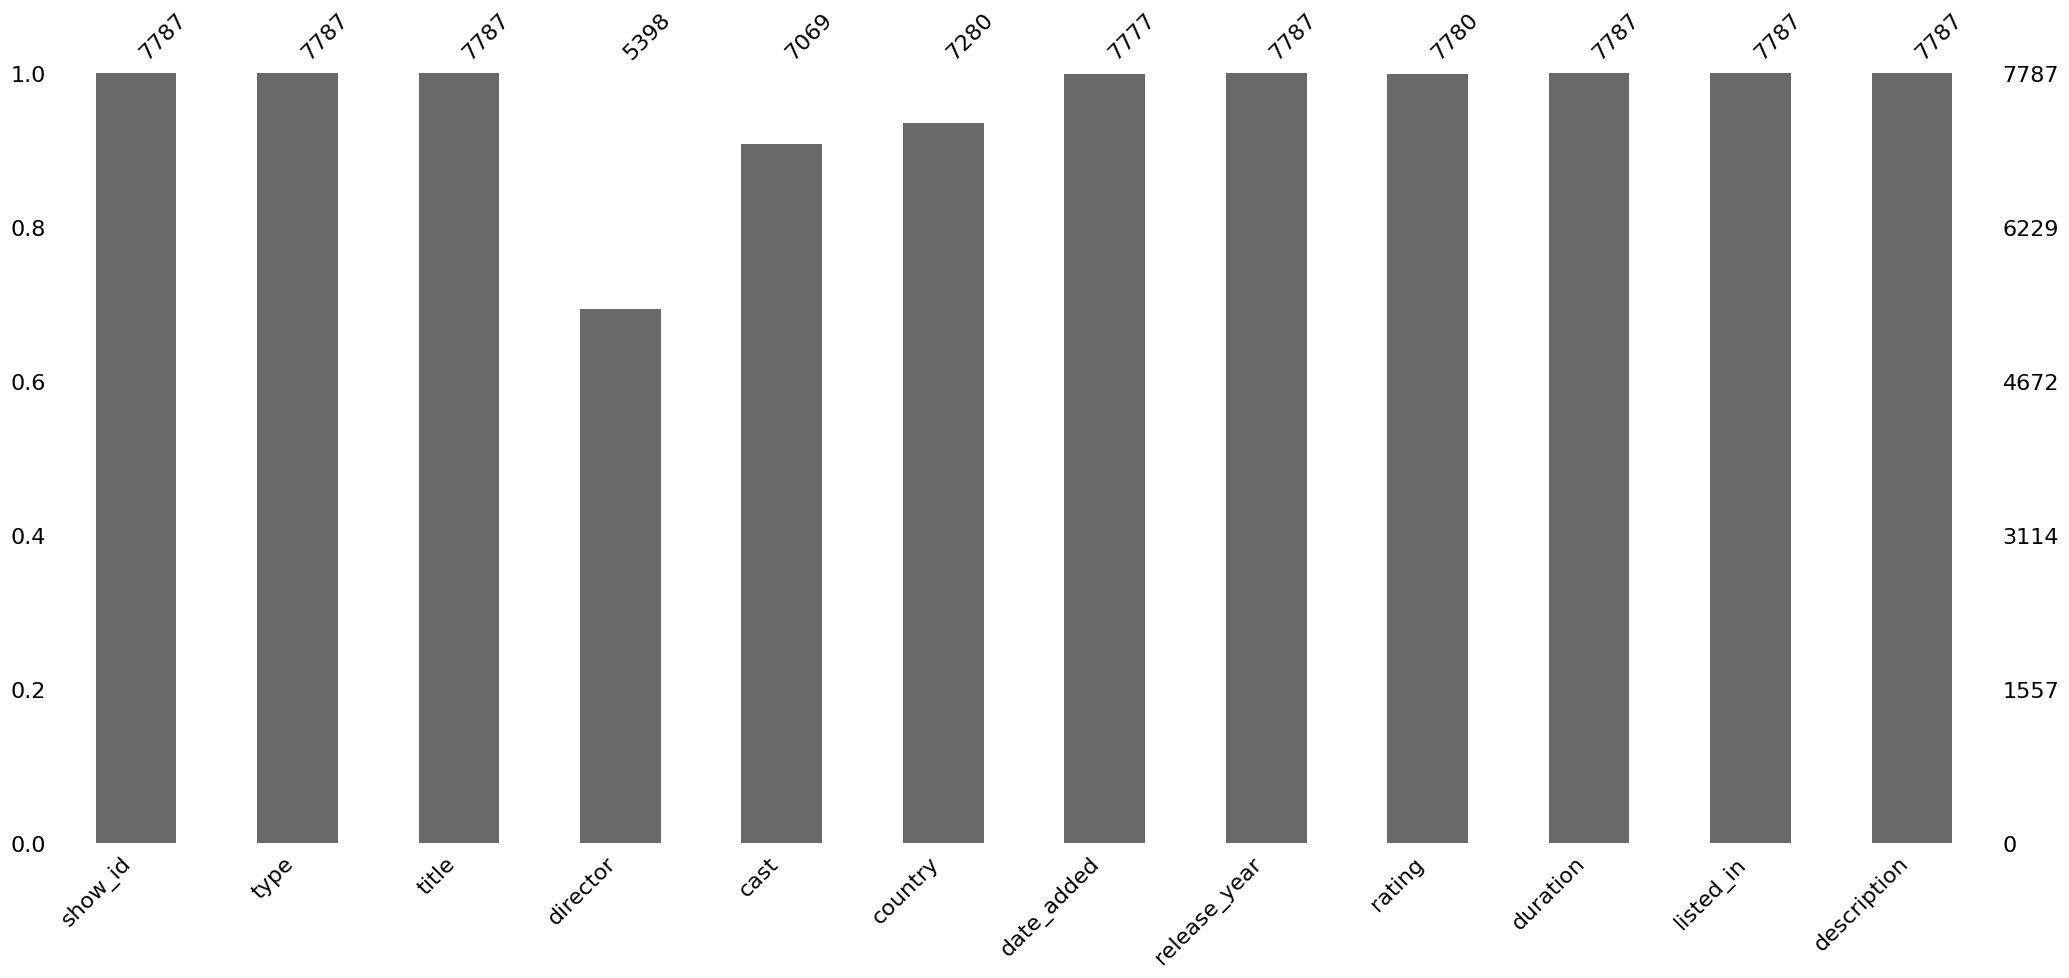

In [ ]:
# Visualizing the missing values
# visualize missing data with a bar chart
msno.bar(df)
plt.show()

### What did you know about your dataset?


* We have a dataset that contains Movies/TV shows in Netflix until 2019.
* The dataset has 7787 entries and 12 columns. Out of the 12 columns, 11 are of 'object' datatype and 1 is of 'numeric' datatype.
* There are no duplicate values in the dataset.
* There are five columns containing missing values. There are total 3631 missing values present in the dataset.

## ***2. Understanding Your Variables***

In [ ]:
# Dataset Columns
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [ ]:
# Dataset Describe
df.describe()

,release_year
count,7787.000000
mean,2013.932580
std,8.757395
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2018.000000
max,2021.000000


### Variables Description 



1. *show_id*: Unique ID for every Movie/TV show
2. *type*: A movie or a TV show
3. *title*: Title of the Movie/TV show
4. *director*: Director of the Movie/TV show
5. *cast*: Actors in the movie
6. *country*: Country of produciton
7. *date_added*: Date it was added on Netflix
8. *release_year*: Actual release year of the Movie/TV show
9. *rating*: Movie/TV show rating
10. *duration*: duration in minutes/number of seasons
11. *listed_in*: Genre
12. *Description*: The description summary


### Check Unique Values for each variable.

In [ ]:
# Check Unique Values for each variable.
df.nunique()

show_id         7787
type               2
title           7787
director        4049
cast            6831
country          681
date_added      1565
release_year      73
rating            14
duration         216
listed_in        492
description     7769
dtype: int64

## 3. ***Data Wrangling***

### Data Wrangling Code

In [ ]:
# Write your code to make your dataset analysis ready.
# Handling Null Values

df['cast'].fillna(value='No cast',inplace=True)
df['country'].fillna(value=df['country'].mode()[0],inplace=True)

In [ ]:
# We drop the null rows in column'date_added' 
# 'rating' column contains insignificant portion of the data so we will drop null values from the dataset

df.dropna(subset=['date_added','rating'],inplace=True)

In [ ]:
# We drop the 'director' column, as there are 30% null values.
df.drop(['director'],inplace=True,axis=1)

In [ ]:
df.isna().sum()

show_id         0
type            0
title           0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

### What all manipulations have you done and insights you found?



* To make our dataset analysis ready, we fill the null values in 'cast' column with 'No cast'.
* We filled the null values in 'country' column with the mode of the column.
* Then we drop rows with null values in 'date_added' and 'rating' columns.
* Also we drop 'director' column as there are 30% null values.
* We then recheckced if there are any remaining null values in the dataset. 

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

### Univariate Analysis

#### Chart - 1 **'type'** (Pieplot)

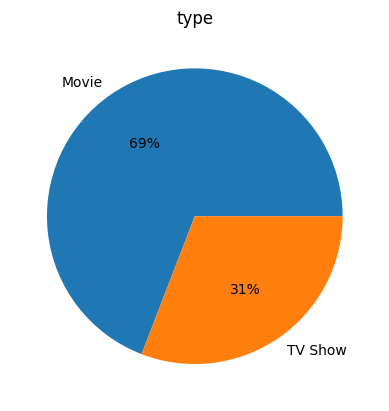

In [ ]:
# Chart - 1 visualization code
# Plotting a piechart for categorical variable- 'type'

plt.pie(df['type'].value_counts(),labels = df['type'].value_counts().keys().tolist(),autopct='%.0f%%')
plt.title('type')
plt.show()

##### 1. Why did you pick the specific chart?

Pie charts are one of the best ways for univariate analysis of categorical data.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 2 **'country'** (Barplot) (Top 10 countries)

In [ ]:
df['country'].value_counts().head(10)

United States     3051
India              923
United Kingdom     396
Japan              224
South Korea        183
Canada             177
Spain              134
France             115
Egypt              101
Turkey             100
Name: country, dtype: int64

Text(0, 0.5, 'Count')

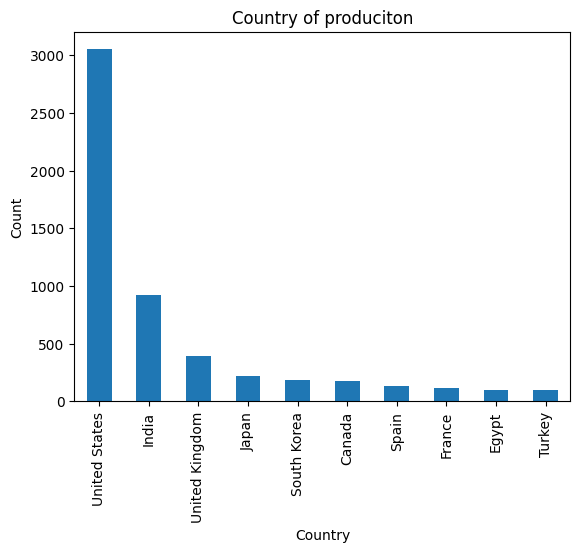

In [ ]:
# Chart - 2 visualization code
# Plotting a countplot for categorical variable- 'country' (Top 10 countries)

df['country'].value_counts().head(10).plot(kind='bar')

plt.title('Country of produciton')
plt.xlabel('Country')
plt.ylabel('Count')

##### 1. Why did you pick the specific chart?

As the values in both x & y axes are not in series / continuous, the bar chart is the best option as details are displayed explicitly.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 3 **'release_year'** (Barplot) (Top 10 years)

In [ ]:
df['release_year'].value_counts().head(10)

2018    1120
2017    1010
2019     996
2016     881
2020     868
2015     536
2014     334
2013     265
2012     218
2010     171
Name: release_year, dtype: int64

Text(0, 0.5, 'Count')

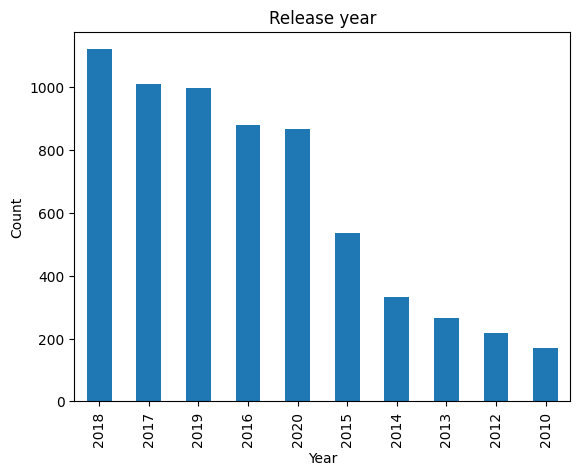

In [ ]:
# Chart - 3 visualization code
# Plotting a countplot for categorical variable- 'release_year' (Top 10 years)

df['release_year'].value_counts().head(10).plot(kind='bar')

plt.title('Release year')
plt.xlabel('Year')
plt.ylabel('Count')

##### 1. Why did you pick the specific chart?

As the values in both x & y axes are not in series / continuous, the bar chart is the best option as details are displayed explicitly.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 4 **'rating'** (Pointplot)

In [ ]:
#creating two extra columns

tv_shows = df[df['type']=='TV Show']
movies = df[df['type']=='Movie']

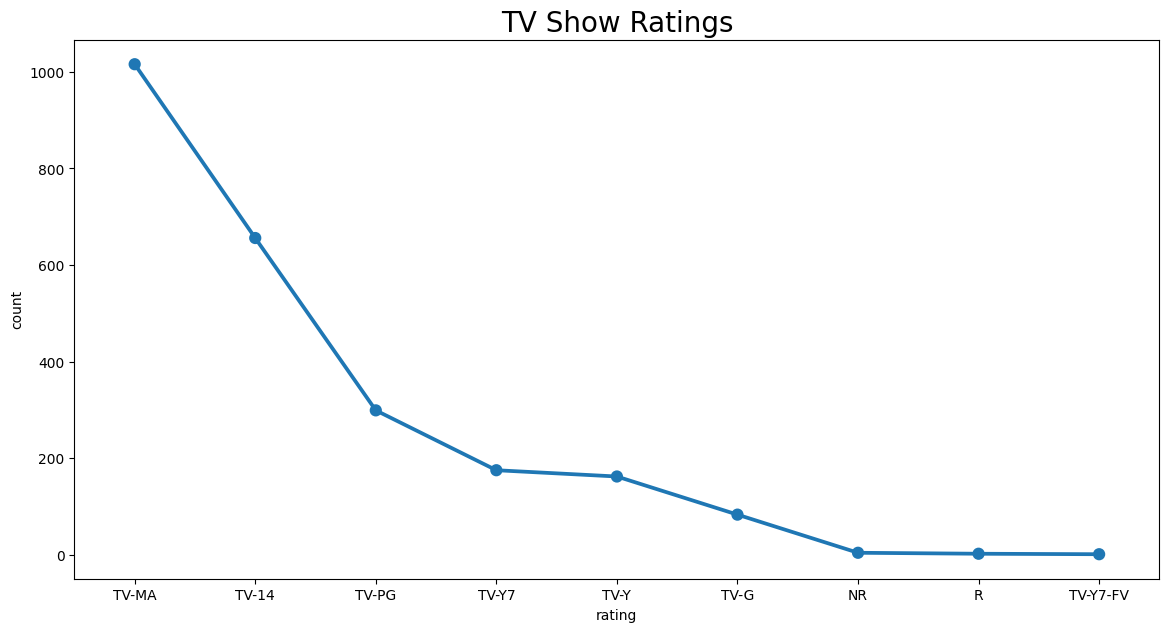

In [ ]:
# group TV shows by 'rating' and count the number of shows in each rating category
tv_ratings = tv_shows.groupby(['rating'])['show_id'].count().reset_index(name='count').sort_values(by='count',ascending=False)

# set figure dimensions
fig_dims = (14,7)

# create a figure and axis object with specified dimensions
fig, ax = plt.subplots(figsize=fig_dims)

# create a point plot using Seaborn's pointplot() function, with 'rating' on the x-axis and 'count' on the y-axis
sns.pointplot(x='rating',y='count',data=tv_ratings)

# set the plot title and font size
plt.title('TV Show Ratings',size='20')

# display the plot
plt.show()

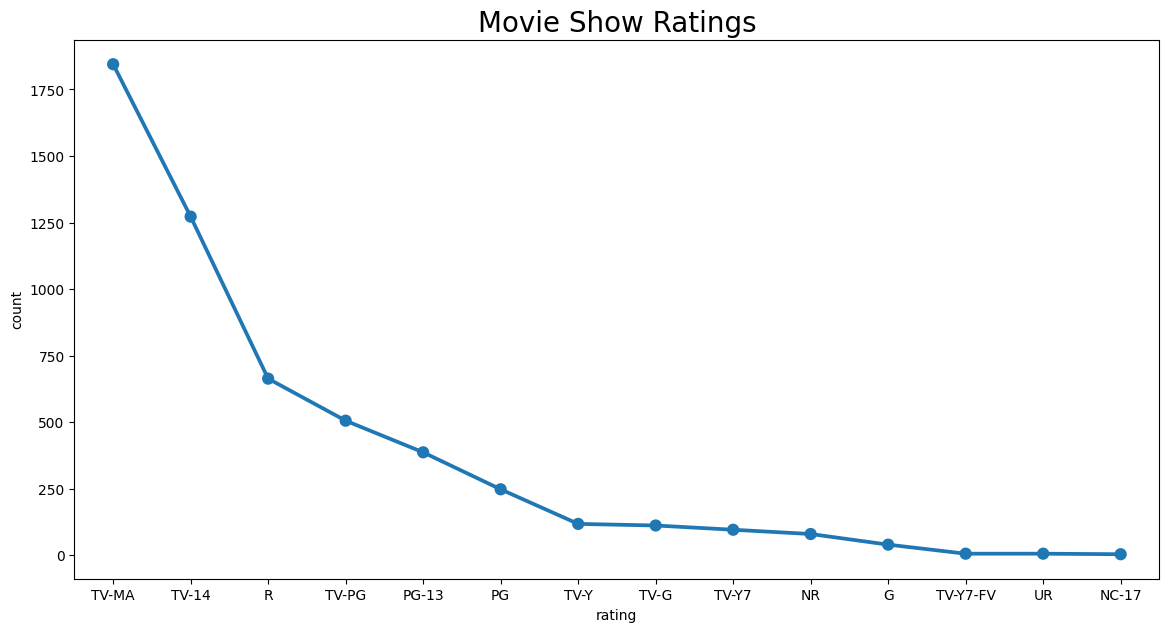

In [ ]:
# group movies by 'rating' and count the number of movies in each rating category
m_ratings = movies.groupby(['rating'])['show_id'].count().reset_index(name='count').sort_values(by='count',ascending=False)

# set figure dimensions
fig_dims = (14,7)

# create a figure and axis object with specified dimensions
fig, ax = plt.subplots(figsize=fig_dims)

# create a point plot using Seaborn's pointplot() function, with 'rating' on the x-axis and 'count' on the y-axis
sns.pointplot(x='rating',y='count',data=m_ratings)

# set the plot title and font size
plt.title('Movie Show Ratings',size='20')

# display the plot
plt.show()

##### 1. Why did you pick the specific chart?

The seaorn pointplot effectively shows the distribution of TV show & moviesratings in a clear and concise manner. Overall, this chart provides a quick and informative overview of the ratings landscape for TV shows & movies on Netflix.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 5 **'duration'** (Hitogram & Countplot)

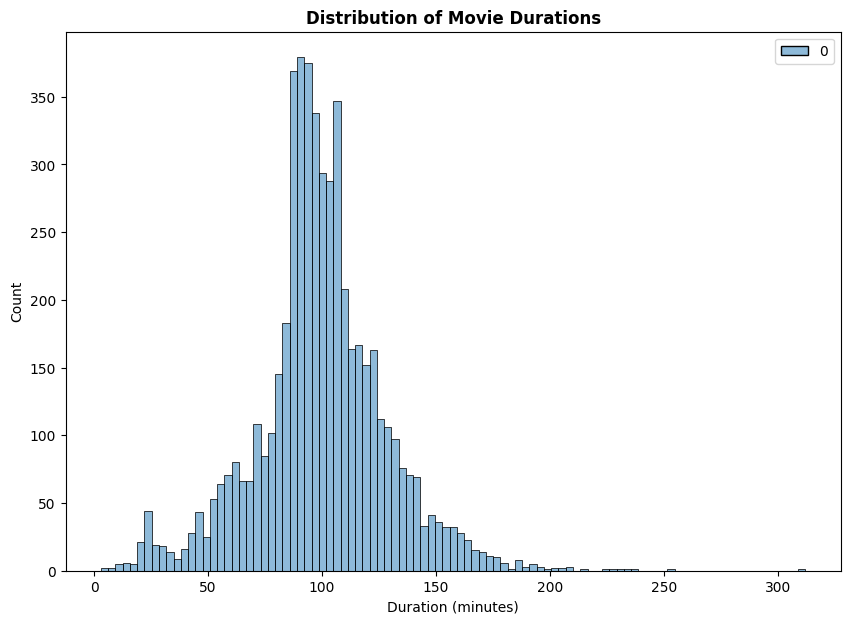

In [ ]:
# Chart - 5 visualization code
# Create a figure and set its size
plt.figure(figsize=(10, 7))

# Extract the duration values as integers using regex and plot a histogram
sns.histplot(movies['duration'].str.extract('(\d+)').astype(int), kde=False, color='red')

# Set the title of the plot
plt.title('Distribution of Movie Durations', fontweight='bold')

# Set the x-axis label
plt.xlabel('Duration (minutes)')

# Set the y-axis label
plt.ylabel('Count')

# Show the plot
plt.show()

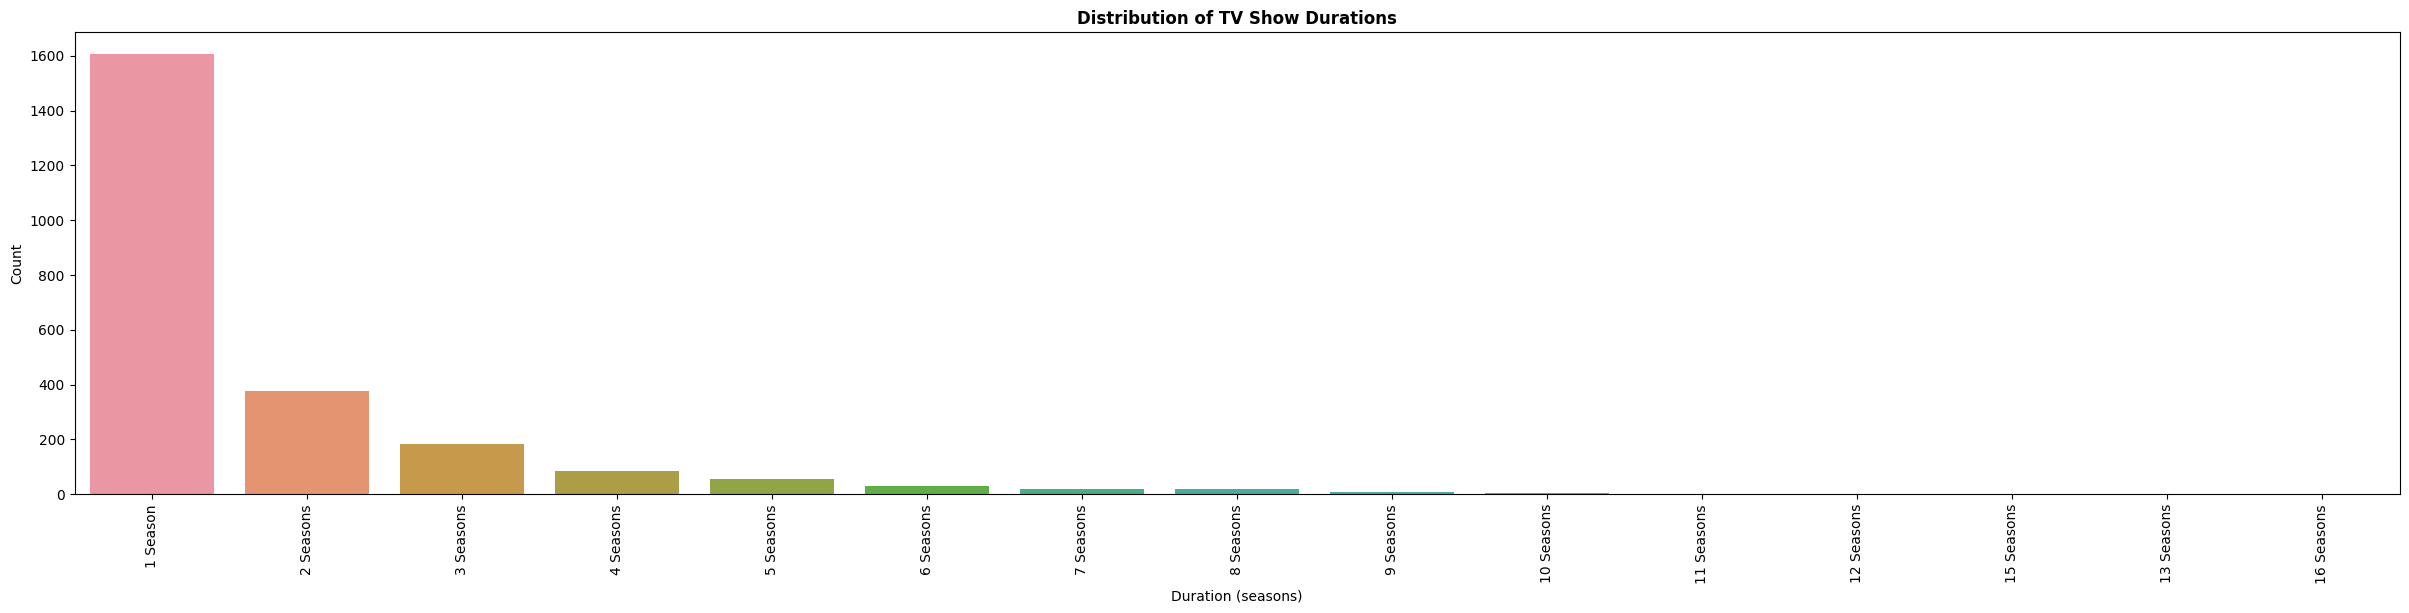

In [ ]:
# Set the figure size
plt.figure(figsize=(30, 6))

# Create a count plot of TV show durations
sns.countplot(x=tv_shows['duration'], data=tv_shows, order=tv_shows['duration'].value_counts().index)

# Set the title of the plot
plt.title("Distribution of TV Show Durations", fontweight='bold')

# Set the x-axis label
plt.xlabel("Duration (seasons)")

# Set the y-axis label
plt.ylabel("Count")

# Rotate the x-axis labels
plt.xticks(rotation=90)

# Show the plot
plt.show()

##### 1. Why did you pick the specific chart?

For movies: Histogram along with the KDE line lets us visualize the density & the distribution of the feature. The mean & medain dashed lines also gives us the level of skewness. <br>
For TV shows: Countplot is one of the best way to visualize the value count distribution of a categorical variable.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 6 **'listed_in'** (Countplot)

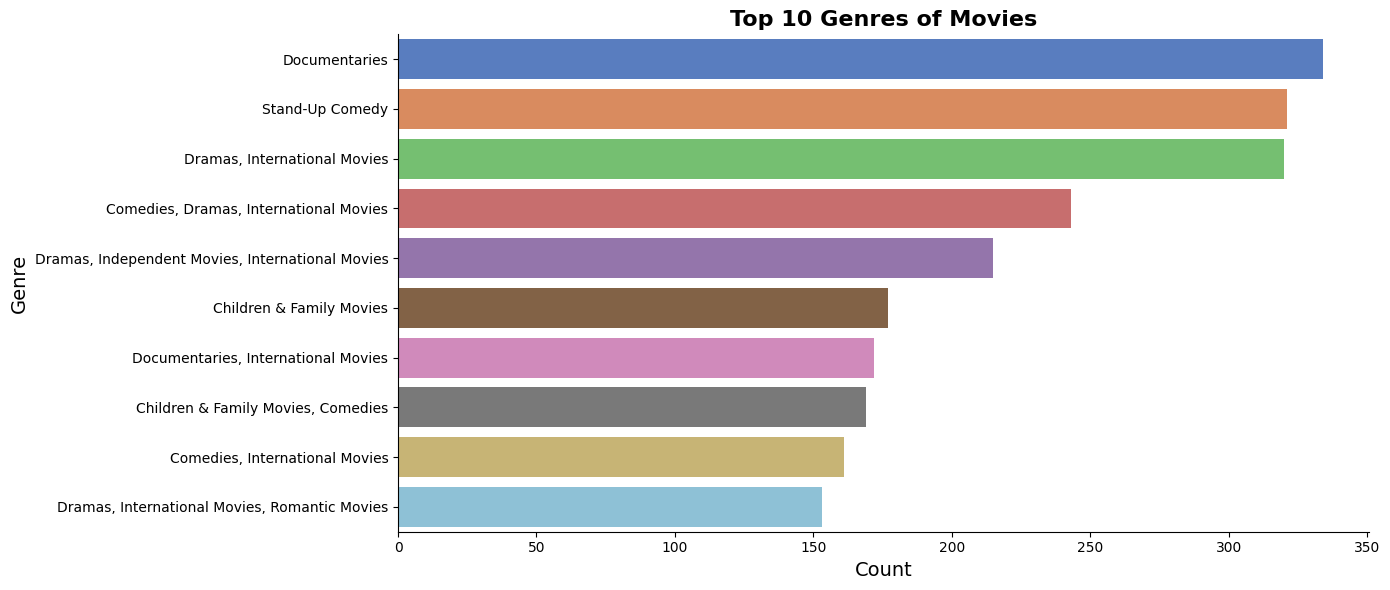

In [ ]:
# Chart - 6 visualization code
#Top 10 genres of movies

top10_movies = movies['listed_in'].value_counts().index[0:10]

#Visualization of code
plt.figure(figsize=(14, 6))
sns.countplot(y='listed_in', data=movies, order=top10_movies, palette='muted')
plt.title('Top 10 Genres of Movies', fontsize=16, fontweight='bold')
plt.xlabel('Count', fontsize=14)
plt.ylabel('Genre', fontsize=14)
sns.despine()
plt.tight_layout()
plt.show()

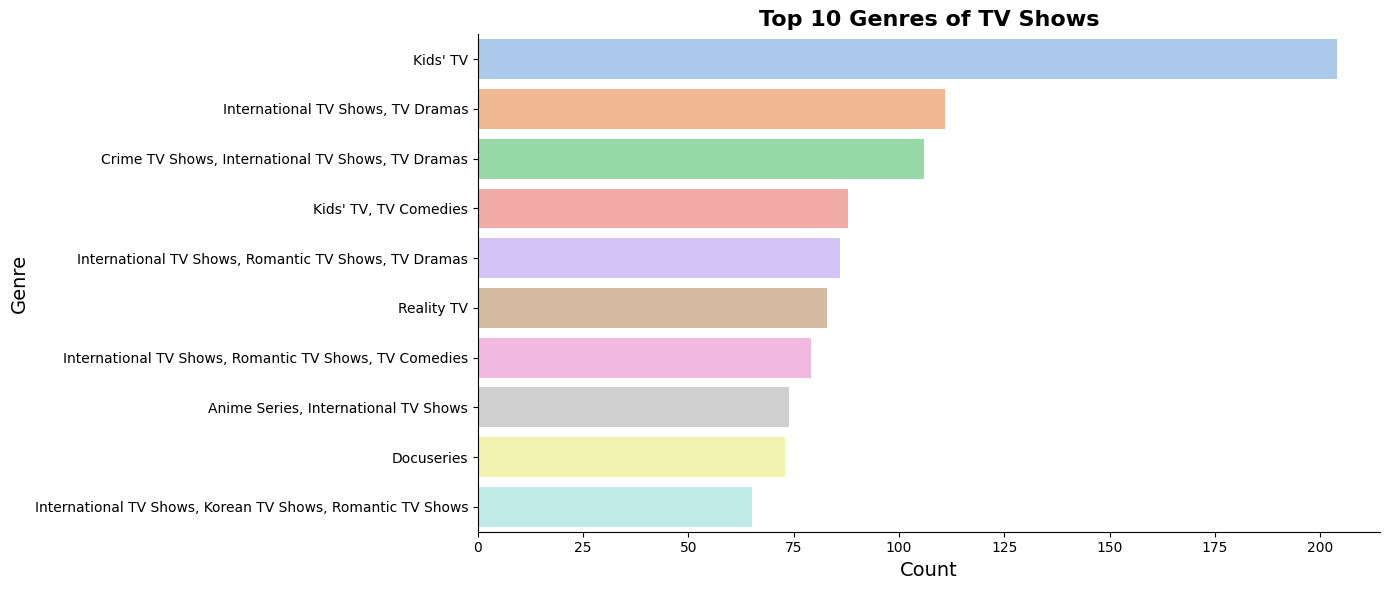

In [ ]:
#Top 10 Genres of Tv shows
top10_tvshows = tv_shows['listed_in'].value_counts().index[0:10]

#Visualization
plt.figure(figsize=(14, 6))
sns.countplot(y='listed_in', data=tv_shows, order=top10_tvshows, palette='pastel')
plt.title('Top 10 Genres of TV Shows', fontsize=16, fontweight='bold')
plt.xlabel('Count', fontsize=14)
plt.ylabel('Genre', fontsize=14)
sns.despine()
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

For Movies & TV shows: Countplot is one of the best way to visualize the value count distribution of a categorical variable.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 15 - Pair Plot 

<Figure size 1500x800 with 0 Axes>

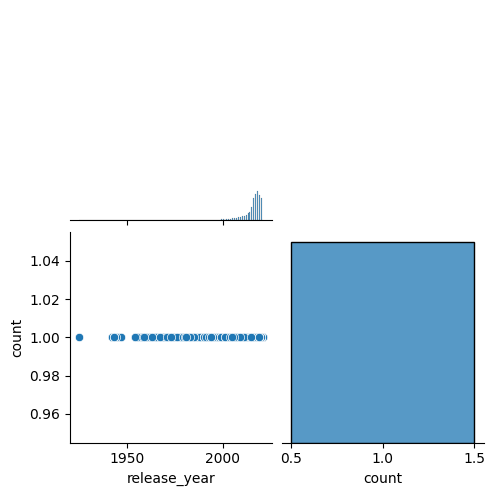

In [ ]:
# Pair Plot visualization code

plt.figure(figsize=(15,8))
sns.pairplot(df, corner=True)

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.



* Netflix has the highest number of content in the United States, followed by India. India has the highest number of movies on Netflix
* According to the countplot, it appears that Netflix adds the highest number of movies and TV shows during the period between October and January. This period seems to be the busiest time of year for Netflix in terms of adding new content to its platform.



### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.



Netflix has the highest number of content in the United States, followed by India. India has the highest number of movies on Netflix
*   Null hypothesis H0: The average number of movies on Netflix in the United States is equal to the average number of movies on Netflix in India.

*   Alternate hypothesis Ha: The average number of movies on Netflix in the United States is greater than the average number of movies on Netflix in India.




#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value
# Filter by country
us_movies = movies[movies.country == 'United States']
india_movies = movies[movies.country == 'India']

# Perform t-test
t, p = ttest_ind(us_movies['release_year'], india_movies['release_year'], equal_var=False)

# Print the results
alpha = 0.05
if p < alpha:
    print("Reject null hypothesis. The average number of movies on Netflix in the United States is greater than the average number of movies on Netflix in India.")
else:
    print("Fail to reject null hypothesis.")

Reject null hypothesis. The average number of movies on Netflix in the United States is greater than the average number of movies on Netflix in India.


##### Which statistical test have you done to obtain P-Value?

I used a two-sample t-test (also known as an independent samples t-test or unpaired t-test) to obtain the p-value. Specifically, I used the ttest_ind function from the scipy.stats module to perform the t-test. This test is appropriate for comparing the means of two independent samples, which is what we're doing here by comparing the number of movies on Netflix in the United States and India.

##### Why did you choose the specific statistical test?

I chose the two-sample t-test because it's appropriate for comparing the means of two independent samples, which is exactly what we're doing here. We have two independent samples of movies on Netflix in the United States and India, and we want to test whether the mean number of movies in the United States is significantly different from the mean number of movies in India.

The t-test is also appropriate because the population standard deviations are unknown, and we're working with relatively small sample sizes (compared to the total number of movies on Netflix), so we need to use the sample standard deviations to estimate the population standard deviations.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

 According to the countplot, it appears that Netflix adds the highest number of movies and TV shows during the period between October and January. This period seems to be the busiest time of year for Netflix in terms of adding new content to its platform.
 *   Null hypothesis H0: There is no significant difference in the number of movies and TV shows added by Netflix across different months.

*   Alternate hypothesis Ha: There is a significant difference in the number of movies and TV shows added by Netflix across different months.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value
# Convert the "date_added" column to datetime format
df["date_added"] = pd.to_datetime(df["date_added"])

# Extract the month from the "date_added" column
df["month_added"] = df["date_added"].dt.month_name()

# Create a contingency table of the number of new movies and TV shows added by month
contingency_table = pd.crosstab(df["type"], df["month_added"])

# Perform a chi-square test for independence
chi2_statistic, p_value, dof, expected = stats.chi2_contingency(contingency_table)

print("Chi-square statistic:", chi2_statistic)
print("P-value:", p_value)

NameError: ignored

##### Which statistical test have you done to obtain P-Value?

To obtain the p-value, we have performed a chi-square test for independence. The chi-square test is used to determine if there is a significant association between two categorical variables. In this case, we wanted to test if there was a significant association between the time of year and the number of new movies and TV shows added to Netflix. The test involves comparing the observed frequencies of the contingency table (which shows the distribution of the data) to the expected frequencies under the assumption of independence. 

##### Why did you choose the specific statistical test?

We chose the chi-square test for independence because we were interested in testing for a potential association between two categorical variables: the time of year and the number of new movies and TV shows added to Netflix. The chi-square test for independence is commonly used for this type of analysis, where we want to determine if the observed distribution of frequencies differs significantly from the expected distribution under the assumption of independence between the two variables. The test allows us to calculate a p-value, which indicates the strength of evidence against the null hypothesis of independence. If the p-value is less than the significance level (usually 0.05), we reject the null hypothesis and conclude that there is a significant association between the two variables. Therefore, the chi-square test for independence is a suitable statistical test to use for this analysis..

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

The number of movies on Netflix is greater than the number of TV shows, with 5372 movies and 2398 TV shows currently available on the platform.
*   Null hypothesis H0:  The number of movies and TV shows on Netflix is not significantly different.

*   Alternate hypothesis Ha: The number of movies on Netflix is significantly greater than the number of TV shows.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value
from statsmodels.stats.proportion import proportions_ztest
# Count the number of movies and TV shows
n_movies = df[df['type'] == 'Movie'].count()['type']
n_tv_shows = df[df['type'] == 'TV Show'].count()['type']

# Set the counts and sample sizes for the z-test
counts = [n_movies, n_tv_shows]
nobs = [len(df), len(df)]

# Perform the z-test assuming equal proportions
z_stat, p_val = proportions_ztest(counts, nobs, value=0, alternative='larger')

# Print the results
print('Number of movies:', n_movies)
print('Number of TV shows:', n_tv_shows)
print('z-statistic:', z_stat)
print('p-value:', p_val)

##### Which statistical test have you done to obtain P-Value?

I used a two-sample z-test for proportions to obtain the p-value. The null hypothesis for the test is that the proportion of movies and TV shows on Netflix is equal, while the alternative hypothesis is that the proportion of movies is greater than the proportion of TV shows.

##### Why did you choose the specific statistical test?

I chose the two-sample z-test for proportions to compare the number of movies and TV shows on Netflix because the data consists of two categorical variables (movie or TV show), and we want to test if there is a significant difference between the proportions of these categories in the population. The two-sample z-test for proportions is an appropriate test to use when we have two independent samples, and we want to compare the proportion of successes in each sample. In this case, a success refers to a movie or TV show. The test assumes that the samples are large enough to apply the normal approximation to the binomial distribution. Since we have a large sample size in this case, we can use the z-test for proportions to test the hypothesis of interest.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [ ]:
# Handling Missing Values & Missing Value Imputation

#### What all missing value imputation techniques have you used and why did you use those techniques?

Answer Here.

### 2. Handling Outliers

In [ ]:
# Handling Outliers & Outlier treatments

##### What all outlier treatment techniques have you used and why did you use those techniques?

Answer Here.

### 3. Categorical Encoding

In [ ]:
# Encode your categorical columns

#### What all categorical encoding techniques have you used & why did you use those techniques?

Answer Here.

### 4. Textual Data Preprocessing 
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

#### 1. Expand Contraction

In [ ]:
# Expand Contraction

#### 2. Lower Casing

In [ ]:
# Lower Casing

#### 3. Removing Punctuations

In [ ]:
# Remove Punctuations

#### 4. Removing URLs & Removing words and digits contain digits.

In [ ]:
# Remove URLs & Remove words and digits contain digits

#### 5. Removing Stopwords & Removing White spaces

In [ ]:
# Remove Stopwords

In [ ]:
# Remove White spaces

#### 6. Rephrase Text

In [ ]:
# Rephrase Text

#### 7. Tokenization

In [ ]:
# Tokenization

#### 8. Text Normalization

In [ ]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)

##### Which text normalization technique have you used and why?

Answer Here.

#### 9. Part of speech tagging

In [ ]:
# POS Taging

#### 10. Text Vectorization

In [ ]:
# Vectorizing Text

##### Which text vectorization technique have you used and why?

Answer Here.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [ ]:
# Manipulate Features to minimize feature correlation and create new features

#### 2. Feature Selection

In [ ]:
# Select your features wisely to avoid overfitting

##### What all feature selection methods have you used  and why?

Answer Here.

##### Which all features you found important and why?

Answer Here.

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

In [ ]:
# Transform Your data

### 6. Data Scaling

In [ ]:
# Scaling your data

##### Which method have you used to scale you data and why?

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

Answer Here.

In [ ]:
# DImensionality Reduction (If needed)

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

Answer Here.

### 8. Data Splitting

In [ ]:
# Split your data to train and test. Choose Splitting ratio wisely.

##### What data splitting ratio have you used and why? 

Answer Here.

### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

Answer Here.

In [ ]:
# Handling Imbalanced Dataset (If needed)

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

Answer Here.

## ***7. ML Model Implementation***

### ML Model - 1

In [ ]:
# ML Model - 1 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### ML Model - 2

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

Answer Here.

### ML Model - 3

In [ ]:
# ML Model - 3 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

Answer Here.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

Answer Here.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

Answer Here.

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [ ]:
# Save the File

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [ ]:
# Load the File and predict unseen data.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

Write the conclusion here.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***